# MoNet: A Versatile Python Toolkit for Constructing Neural Networks with Enhanced Flexibility and Functionality

Yongfan Ming, Danyang Xiong, Xiao He, Min Li

### <b>Abstract</b>: When constructing algorithms or neural networks, the process can often feel complex and cumbersome. To provide a clearer description, graphical decompositions are commonly used, but they may complicate simple matters. This framework aims to simplify the process, making AI construction more concise and understandable. Current methods result in lengthy code that can be difficult to visually comprehend the structure of. This article proposes the use of a simple formula-based approach to describe and construct neural networks, enabling functions such as variable function naming, formula-based process calculations, and degenerate network construction. This includes the DefDefObj, FlowFunc, and MoNet modules.
提供了以下基本功能：
1. 函数名可变函数定义与调用
2. 函数流式传递与公式化表达
3. 网络尺寸简约化与灵活定义
对以下常用网络进行了构建：
1. PLA
2. MLP
3. AlexNet
4. Transformer
5.
6.
7.
8.
9.
10.
### <b>KeyWords</b>: Python; TensorFlow; PyTorch; Artificial Intelligence



## Introduction

## Basic usage

### installlation

In [4]:
%cd .
%pip install -e . -q

d:\Code\SkorchAI\src\MoNet


d:\Code\SkorchAI\src\MoNet\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Note: you may need to restart the kernel to use updated packages.


### import and initial

In [1]:
from monet import MoNetInitial
m = MoNetInitial()

### Usage1: Variable Name Function Definition and Calling

- **ddf**: add a define guide how to define function  
- **fit**: fit a different ddf function with change name

In [2]:
#1. @m.ddf add the top of an def function
# and difine the Variable name in function name
from monet.example import func_pla

@m.ddf("pla_Type1")
def pla(_x=[0,1],Type='NAND'):
    wb={
        "AND":[[0.5,0.5],-0.7],
        "OR":[[0.5,0.5],-0.2],
        "NAND":[[-0.5,-0.5],0.7]
    }
    _w,b=wb[Type]
    return func_pla(_w,_x,b)>0

@m.ddf
def pla_Type3(_x=[0,1],Type='NAND'):
    return pla(_x,Type)

m.ddf("pla_Type2",pla)
m.ddf(pla_Type3)

m.fit("pla_AND").initkwargs

{'Type': 'AND'}

In [5]:
#1. @m.ddf add the top of an def function
# and difine the Variable value in function name
# this mode meas all the Variable is in function name
# and can only split by _ but the first Variable
import torch.nn as nn # type: ignore

m.ddf("fc_10_1",lambda _in,out:nn.Linear(_in,out))
m.funcspace.popitem(-1)

('fc_10_1',
 {'default': {'_in': 10, 'out': 1},
  'help': (),
  'func': <function __main__.<lambda>(_in, out)>,
  'splits': ['fc_10_1']})

In [ ]:
#2. load from a json or dict
# can see the expale
from monet.example import funcspace_dict_full,funcspace_dict_name,funcspace_dict_value
m.ddf(funcspace_dict_full)
m.ddf(funcspace_dict_name)
m.ddf(funcspace_dict_value)

In [9]:
F=m.f*"cv2"*"cv3"
F

seq>Fn(
  (0): @ddf:'cv2' *id:2261792054512
  (1): @ddf:'cv3' *id:2261792054464
)

#### Usage2: Function Flow Transfer and Formulaic Expression

- **f**: get a blank defdef function to call with any function
  - f(x) -> x
- **+**: cat the output of two function
  - (A+B)(x) -> cat( [A(x), B(x)] )
  - (A+3)(x) -> cat( [A(x), A(x), A(x)] )
- **&**: deepcopy mode of +
  - (A&A)(x) -> cat( [A(x), dpA(x)] )
  - (A&3)(x) -> cat( [A(x), dp1A(x), dp2A(x)] )
- **\***: transfer the output of one function to another function
  - (A*B)(x) -> B(A(x))
  - (A*3)(x) -> A(A(A(x)))
- **\*\***: deepcopy mode of *
  - (A**A)(x) -> dpA(A(x))
  - (A**3)(x) -> dp2A(dp1A(A(x)))
- **,**: lic the output of two function, must use in ()/[] after + or *
  - (A,B)(x) -> [ [A(x), B(x)] ]

In [1]:
from monet import MoNetInitial
from monet.example import pla2_Type

m = MoNetInitial()
m.ddf(pla2_Type)

AND=m.fit("pla2_AND")
OR=m.fit("pla2_OR")
NAND=m.fit("pla2_NAND")

XOR = (AND+OR)*(NAND+OR)*AND

XOR([1,1]),XOR([0,0]),XOR([0,1]),XOR([1,0])

(False, False, True, True)

### Usage 3: Simplification and flexible definition of network size
- **net**: net(i,o_list,net_list), can use defdef function by string
```
net(10,[20,30,20,10],  
       ["fc","fc","fc","fc"])(x) ->  

fc = nn.Linear
net(10,[20,30,20,10],  
       [fc,fc,fc,fc])(x) -> 

(f*fc(10,20)*fc(20,30)*fc(30,20)*fc(20,10))(x) ->

    x=fc(10,20)(x)  
    x=fc(20,30)(x)  
    x=fc(30,20)(x)  
    x=fc(20,10)(x)
```

how to add help

## Example

AlexNet Code use pytorch

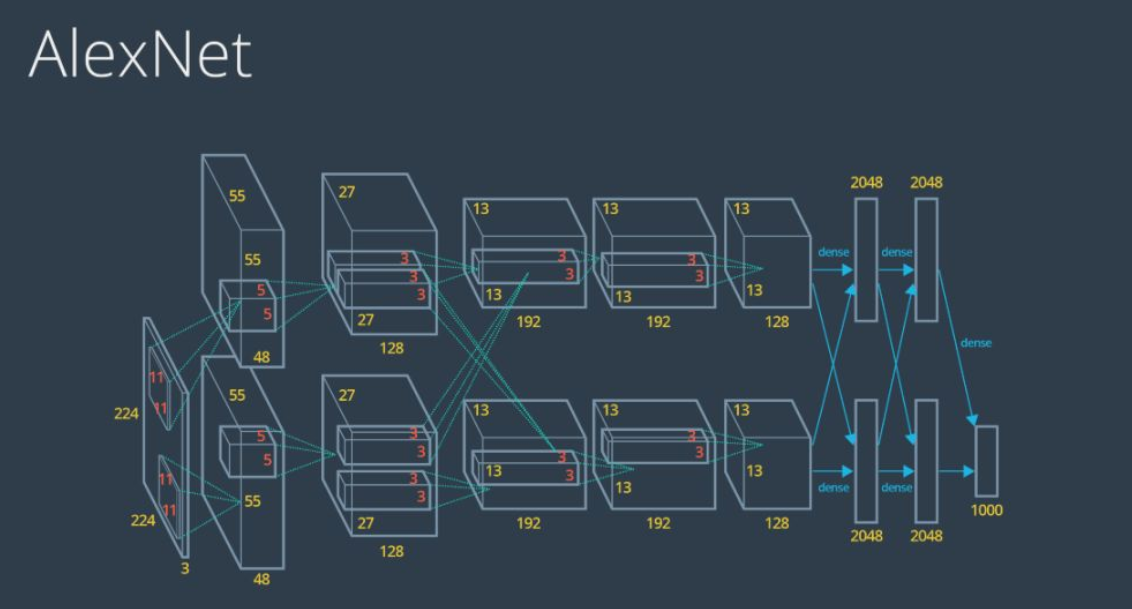

In [1]:
import torch
import torch.nn as nn

# Define the AlexNet model
class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

AlexNet()


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Transformer内部结构从头实现

```plaintext
Transformer内部结构主要包括以下几个部分：
1. 输入嵌入层（Input Embedding Layer）：将输入的token序列转换为词嵌入向量表示。
2. 位置编码（Positional Encoding）：为输入的token序列添加位置信息，以便模型能够区分不同位置的词。
3. 编码器（Encoder）：由多个编码器层组成，每个编码器层包括自注意力机制和前馈神经网络。
4. 解码器（Decoder）：由多个解码器层组成，每个解码器层包括自注意力机制、编码器-解码器注意力机制和前馈神经网络。
5. 多头注意力机制（Multi-Head Attention）：用于捕捉输入序列中不同位置之间的依赖关系。
6. 前馈神经网络（Feed-Forward Neural Network）：在每个编码器和解码器层中都包含一个前馈神经网络，用于对特征进行非线性变换。
7. 残差连接（Residual Connection）和层归一化（Layer Normalization）：用于加速训练和提高模型性能。
8. 输出层：将解码器的输出转换为最终的预测结果。
```

用pytorch实现这个网络

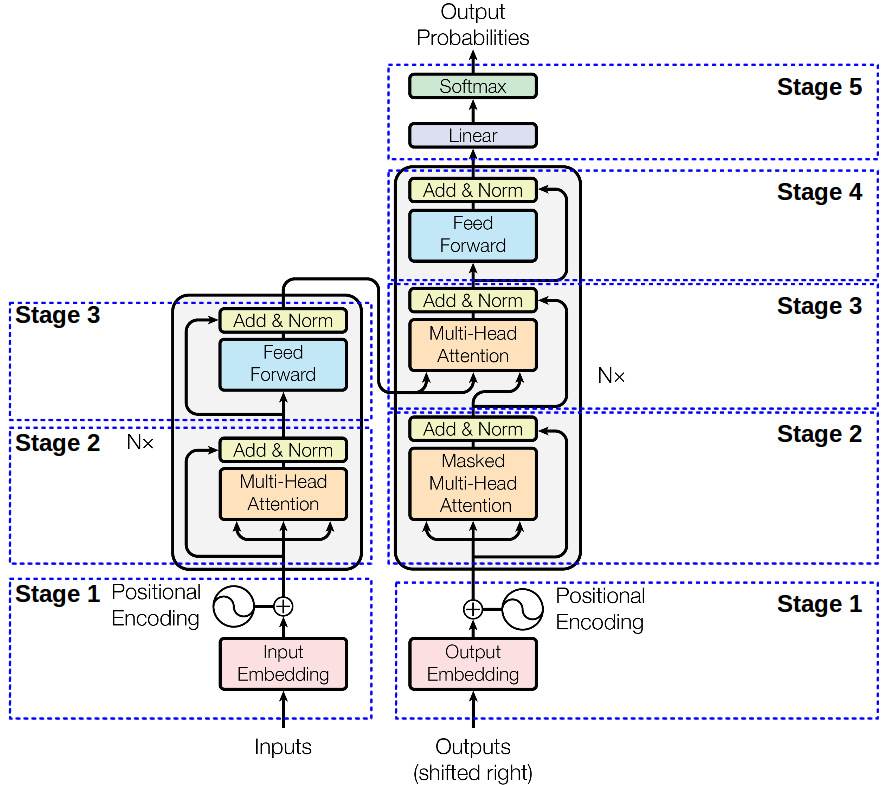

In [ ]:
## from https://github.com/graykode/nlp-tutorial/tree/master/5-1.Transformer

import numpy as np
import torch  # noqa: F811
import torch.nn as nn
import torch.optim as optim
import math


def make_batch(sentences):
    '''
    将原始文本数据预处理成神经网络可以处理的格式的典型例子
    :param sentences:输入句子、输出句子和目标句子
    :return:句子中单词在词汇表中的索引
    '''
    input_batch = [[src_vocab[n] for n in sentences[0].split()]]
    output_batch = [[tgt_vocab[n] for n in sentences[1].split()]]
    target_batch = [[tgt_vocab[n] for n in sentences[2].split()]]
    return torch.LongTensor(input_batch), torch.LongTensor(output_batch), torch.LongTensor(target_batch)



## 10
def get_attn_subsequent_mask(seq):
    """
    生成“后续掩码”，防止模型在预测序列中的元素时“偷看”到后续的元素
    seq: [batch_size, tgt_len]  seq序列张量的维度 批次大小*目标序列长度
    """
    attn_shape = [seq.size(0), seq.size(1), seq.size(1)]
    # attn_shape: [batch_size, tgt_len, tgt_len] 注意力矩阵的形状
    subsequence_mask = np.triu(np.ones(attn_shape), k=1)  # 生成一个上三角符号矩阵，对角线下全是0，上是1，保证每个元素看不到其后面的元素
    subsequence_mask = torch.from_numpy(subsequence_mask).byte() # NumPy数组->Torch 张量->布尔类型
    return subsequence_mask  # [batch_size, tgt_len, tgt_len]


## 7. ScaledDotProductAttention
class ScaledDotProductAttention(nn.Module):
    def __init__(self):
        # 初始化 ScaledDotProductAttention 类的实例，并确保它作为 nn.Module 的子类拥有所有必要的功能和特性
        super(ScaledDotProductAttention, self).__init__()

    def forward(self, Q, K, V, attn_mask):
        '''
        缩放点乘计算注意力分数，结合mask
        留下一个小小的疑惑，encoder
        '''
        ## 输入进来的维度分别是 [batch_size x n_heads x len_q x d_k]  K： [batch_size x n_heads x len_k x d_k]  V: [batch_size x n_heads x len_k x d_v]
        ##首先经过matmul函数得到的scores形状是 : [batch_size x n_heads x len_q x len_k]
        scores = torch.matmul(Q, K.transpose(-1, -2)) / np.sqrt(d_k)

        ## 然后关键地方来了，下面这个就是用到了我们之前重点讲的attn_mask，把被mask的地方置为无限小，softmax之后基本就是0，对q的单词不起作用
        scores.masked_fill_(attn_mask, -1e9) # Fills elements of self tensor with value where mask is one.
        attn = nn.Softmax(dim=-1)(scores)
        context = torch.matmul(attn, V)
        return context, attn


## 6. MultiHeadAttention
class MultiHeadAttention(nn.Module):
    def __init__(self):
        super(MultiHeadAttention, self).__init__()
        ## 输入进来的QKV是相等的，我们会使用映射linear做一个映射得到参数矩阵Wq, Wk,Wv
        self.W_Q = nn.Linear(d_model, d_k * n_heads)
        self.W_K = nn.Linear(d_model, d_k * n_heads)
        self.W_V = nn.Linear(d_model, d_v * n_heads)
        self.linear = nn.Linear(n_heads * d_v, d_model)
        self.layer_norm = nn.LayerNorm(d_model)

    def forward(self, Q, K, V, attn_mask):

        ## 这个多头分为这几个步骤，首先映射分头，然后计算atten_scores，然后计算atten_value;
        ##输入进来的数据形状： Q: [batch_size x len_q x d_model], K: [batch_size x len_k x d_model], V: [batch_size x len_k x d_model]
        residual, batch_size = Q, Q.size(0)
        # (B, S, D) -proj-> (B, S, D) -split-> (B, S, H, W) -trans-> (B, H, S, W)

        ##下面这个就是先映射，后分头；一定要注意的是q和k分头之后维度是一致额，所以一看这里都是dk
        q_s = self.W_Q(Q).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # q_s: [batch_size x n_heads x len_q x d_k]
        k_s = self.W_K(K).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # k_s: [batch_size x n_heads x len_k x d_k]
        v_s = self.W_V(V).view(batch_size, -1, n_heads, d_v).transpose(1,2)  # v_s: [batch_size x n_heads x len_k x d_v]

        ## 输入进行的attn_mask形状是 batch_size x len_q x len_k，然后经过下面这个代码得到 新的attn_mask : [batch_size x n_heads x len_q x len_k]，就是把pad信息重复了n个头上
        attn_mask = attn_mask.unsqueeze(1).repeat(1, n_heads, 1, 1) # 代码的意思是先在第二个维度上增加一个维度，然后这个维度重复n_heads次


        ##然后我们计算 ScaledDotProductAttention 这个函数，去7.看一下
        ## 得到的结果有两个：context: [batch_size x n_heads x len_q x d_v], attn: [batch_size x n_heads x len_q x len_k]
        context, attn = ScaledDotProductAttention()(q_s, k_s, v_s, attn_mask)
        context = context.transpose(1, 2).contiguous().view(batch_size, -1, n_heads * d_v) # context: [batch_size x len_q x n_heads * d_v]
        output = self.linear(context)
        return self.layer_norm(output + residual), attn # output: [batch_size x len_q x d_model]


## 8. PoswiseFeedForwardNet
# 全连接前馈网络 这里Conv用作线性变换
class PoswiseFeedForwardNet(nn.Module):
    def __init__(self):
        super(PoswiseFeedForwardNet, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.layer_norm = nn.LayerNorm(d_model) # 层归一化在 Transformer中常用于稳定训练过程

    def forward(self, inputs):
        residual = inputs # inputs : [batch_size, len_q, d_model]
        output = nn.ReLU()(self.conv1(inputs.transpose(1, 2))) # 换一下维度，因为卷积核期望输入维度为[batch_size, channels, length]
        output = self.conv2(output).transpose(1, 2)  # 维度换回来
        return self.layer_norm(output + residual)   # 残差连接+归一化



## 4. get_attn_pad_mask

## 比如说，我现在的句子长度是5，在后面注意力机制的部分，我们在计算出来QK转置除以根号之后，softmax之前，我们得到的形状
## len_input * len_input  代表每个单词对其余包含自己的单词的影响力

## 所以这里我需要有一个同等大小形状的矩阵(符号矩阵)，告诉我哪个位置是PAD部分，之后在计算softmax之前会把这里置为无穷大；

## 一定需要注意的是这里得到的矩阵形状是batch_size x len_q x len_k，我们是对k中的pad符号进行标识，并没有对q中的做标识，因为与q无关。
## 所以在解码器的交叉注意力block（不是self-att block）需要pad标识的时候，需要来自编码器的k

## seq_q 和 seq_k 不一定一致，在交互注意力，q来自解码端，k来自编码端，所以告诉模型编码这边pad符号信息就可以，解码端的pad信息在交互注意力层是没有用到的；

# 这里的"填充掩码"不同于前面的"后续掩码"，这里是用于标记填充的pad的，后续掩码只有解码器中的自注意力block需要
def get_attn_pad_mask(seq_q, seq_k):
    batch_size, len_q = seq_q.size()
    batch_size, len_k = seq_k.size()
    # eq(zero) is PAD token 通常0是pad
    pad_attn_mask = seq_k.data.eq(0).unsqueeze(1)  # batch_size x 1 x len_k, one is masking  扩充一个维度，让掩码能和注意力分数维度匹配
    return pad_attn_mask.expand(batch_size, len_q, len_k)  # batch_size x len_q x len_k


## 3. PositionalEncoding 代码实现
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()

        ## 位置编码的实现其实很简单，直接对照着公式去敲代码就可以，下面这个代码只是其中一种实现方式；
        ## 从理解来讲，需要注意的就是偶数和奇数在公式上有一个共同部分，我们使用log函数把次方拿下来，方便计算；
        ## pos代表的是单词在句子中的索引，这点需要注意；比如max_len是128个，那么索引就是从0，1，2，...,127
        ##假设我的demodel是512，2i那个符号中i从0取到了255，那么2i对应取值就是0,2,4...510
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)## 这里需要注意的是pe[:, 0::2]这个用法，就是从0开始到最后面，补长为2，其实代表的就是偶数位置
        pe[:, 1::2] = torch.cos(position * div_term)##这里需要注意的是pe[:, 1::2]这个用法，就是从1开始到最后面，补长为2，其实代表的就是奇数位置
        ## 上面代码获取之后得到的pe:[max_len*d_model]

        ## 下面这个代码之后，我们得到的pe形状是：[max_len*1*d_model]
        pe = pe.unsqueeze(0).transpose(0, 1)

        self.register_buffer('pe', pe)  ## 定一个缓冲区，其实简单理解为这个参数不更新就可以

    def forward(self, x):
        """
        x: [seq_len, batch_size, d_model]
        """
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)


## 5. EncoderLayer ：包含两个部分，多头注意力机制和前馈神经网络
class EncoderLayer(nn.Module):
    def __init__(self):
        super(EncoderLayer, self).__init__()
        self.enc_self_attn = MultiHeadAttention()
        self.pos_ffn = PoswiseFeedForwardNet()

    def forward(self, enc_inputs, enc_self_attn_mask):
        ## 下面这个就是做自注意力层，输入是enc_inputs，形状是[batch_size x seq_len_q x d_model] 需要注意的是最初始的QKV矩阵是等同于这个输入的，去看一下enc_self_attn函数 6.
        enc_outputs, attn = self.enc_self_attn(enc_inputs, enc_inputs, enc_inputs, enc_self_attn_mask) # enc_inputs to same Q,K,V
        enc_outputs = self.pos_ffn(enc_outputs) # enc_outputs: [batch_size x len_q x d_model]
        return enc_outputs, attn


## 2. Encoder 部分包含三个部分：词向量embedding，位置编码部分，注意力层及后续的前馈神经网络

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.src_emb = nn.Embedding(src_vocab_size, d_model)  ## 这个其实就是去定义生成一个矩阵，大小是 src_vocab_size * d_model
        self.pos_emb = PositionalEncoding(d_model) ## 位置编码情况，这里是固定的正余弦函数，也可以使用类似词向量的nn.Embedding获得一个可以更新学习的位置编码
        self.layers = nn.ModuleList([EncoderLayer() for _ in range(n_layers)]) ## 使用ModuleList对多个encoder进行堆叠，因为后续的encoder并没有使用词向量和位置编码，所以抽离出来；

    def forward(self, enc_inputs):
        ## 这里我们的 enc_inputs 形状是： [batch_size x source_len]

        ## 下面这个代码通过src_emb，进行索引定位，enc_outputs输出形状是[batch_size, src_len, d_model]  词嵌入
        enc_outputs = self.src_emb(enc_inputs)

        ## 这里就是位置编码，把两者相加放入到了这个函数里面，从这里可以去看一下位置编码函数的实现；3.
        enc_outputs = self.pos_emb(enc_outputs.transpose(0, 1)).transpose(0, 1)  # 这里的维度交换，可能是因为序列长度在第一个维度

        ##get_attn_pad_mask是为了得到句子中pad的位置信息，给到模型后面，在计算自注意力和交互注意力的时候去掉pad符号的影响，去看一下这个函数 4.
        enc_self_attn_mask = get_attn_pad_mask(enc_inputs, enc_inputs)
        enc_self_attns = []
        for layer in self.layers:
            ## 去看EncoderLayer 层函数 5.
            enc_outputs, enc_self_attn = layer(enc_outputs, enc_self_attn_mask)
            enc_self_attns.append(enc_self_attn)
        return enc_outputs, enc_self_attns

## 10.
class DecoderLayer(nn.Module):
    def __init__(self):
        super(DecoderLayer, self).__init__()
        self.dec_self_attn = MultiHeadAttention() # 解码器
        self.dec_enc_attn = MultiHeadAttention() # 编码器-解码器
        self.pos_ffn = PoswiseFeedForwardNet()

    def forward(self, dec_inputs, enc_outputs, dec_self_attn_mask, dec_enc_attn_mask):
        # 解码器的自注意力层处理解码器输入（dec_inputs），同时使用后续掩码（dec_self_attn_mask）防止“偷看”未来的信息。
        dec_outputs, dec_self_attn = self.dec_self_attn(dec_inputs, dec_inputs, dec_inputs, dec_self_attn_mask)
        # 编码器-解码器注意力层将解码器自注意力的输出（dec_outputs）作为查询，编码器的输出（enc_outputs）作为键和值，并利用掩码（dec_enc_attn_mask）
        dec_outputs, dec_enc_attn = self.dec_enc_attn(dec_outputs, enc_outputs, enc_outputs, dec_enc_attn_mask)
        # 全连接前馈网络
        dec_outputs = self.pos_ffn(dec_outputs)
        return dec_outputs, dec_self_attn, dec_enc_attn

## 9. Decoder

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.tgt_emb = nn.Embedding(tgt_vocab_size, d_model)
        self.pos_emb = PositionalEncoding(d_model)
        self.layers = nn.ModuleList([DecoderLayer() for _ in range(n_layers)])

    def forward(self, dec_inputs, enc_inputs, enc_outputs): # dec_inputs : [batch_size x target_len] enc_inputs这个应该只是为了告诉哪些是pad符号
        dec_outputs = self.tgt_emb(dec_inputs)  # [batch_size, tgt_len, d_model]
        dec_outputs = self.pos_emb(dec_outputs.transpose(0, 1)).transpose(0, 1) # [batch_size, tgt_len, d_model]

        ## get_attn_pad_mask 自注意力层的时候的pad 部分 得到一个符号矩阵 pad的地方是1
        dec_self_attn_pad_mask = get_attn_pad_mask(dec_inputs, dec_inputs)

        ## get_attn_subsequent_mask 这个做的是自注意层的mask部分，就是当前单词之后看不到，使用一个上三角为1的矩阵
        dec_self_attn_subsequent_mask = get_attn_subsequent_mask(dec_inputs)

        ## 两个矩阵相加，大于0的为1，不大于0的为0，为1的在之后就会被fill到无限小  填充掩码和后续掩码矩阵相加
        dec_self_attn_mask = torch.gt((dec_self_attn_pad_mask + dec_self_attn_subsequent_mask), 0)


        ## 这个做的是交互注意力机制中的mask矩阵，enc的输入是k，我去看这个k里面哪些是pad符号，给到后面的模型；注意哦，我q肯定也是有pad符号，但是这里我不在意的，之前说了好多次了哈
        dec_enc_attn_mask = get_attn_pad_mask(dec_inputs, enc_inputs)

        dec_self_attns, dec_enc_attns = [], []
        for layer in self.layers:
            dec_outputs, dec_self_attn, dec_enc_attn = layer(dec_outputs, enc_outputs, dec_self_attn_mask, dec_enc_attn_mask)
            dec_self_attns.append(dec_self_attn)
            dec_enc_attns.append(dec_enc_attn)
        return dec_outputs, dec_self_attns, dec_enc_attns


## 1. 从整体网路结构来看，分为三个部分：编码层，解码层，输出层
class Transformer(nn.Module):
    def __init__(self):
        super(Transformer, self).__init__()
        self.encoder = Encoder()  ## 编码层
        self.decoder = Decoder()  ## 解码层
        self.projection = nn.Linear(d_model, tgt_vocab_size, bias=False) ## 输出层 d_model 是我们解码层每个token输出的维度大小，之后会做一个 tgt_vocab_size 大小的softmax
    def forward(self, enc_inputs, dec_inputs):
        ## 这里有两个数据进行输入，一个是enc_inputs 形状为[batch_size, src_len]，主要是作为编码段的输入，一个dec_inputs，形状为[batch_size, tgt_len]，主要是作为解码端的输入

        ## enc_inputs作为输入 形状为[batch_size, src_len]，输出由自己的函数内部指定，想要什么指定输出什么，可以是全部tokens的输出，可以是特定每一层的输出；也可以是中间某些参数的输出；
        ## enc_outputs就是主要的输出，enc_self_attns这里没记错的是QK转置相乘之后softmax之后的矩阵值，代表的是每个单词和其他单词相关性；
        enc_outputs, enc_self_attns = self.encoder(enc_inputs)

        ## dec_outputs 是decoder主要输出，用于后续的linear映射； dec_self_attns类比于enc_self_attns 是查看每个单词对decoder中输入的其余单词的相关性；dec_enc_attns是decoder中每个单词对encoder中每个单词的相关性；
        dec_outputs, dec_self_attns, dec_enc_attns = self.decoder(dec_inputs, enc_inputs, enc_outputs)

        ## dec_outputs做映射到词表大小
        dec_logits = self.projection(dec_outputs) # dec_logits : [batch_size x src_vocab_size x tgt_vocab_size]
        return dec_logits.view(-1, dec_logits.size(-1)), enc_self_attns, dec_self_attns, dec_enc_attns



if __name__ == '__main__':

    ## 句子的输入部分，
    sentences = ['ich mochte ein bier P', 'S i want a beer', 'i want a beer E']


    # Transformer Parameters
    # Padding Should be Zero
    ## 构建词表
    src_vocab = {'P': 0, 'ich': 1, 'mochte': 2, 'ein': 3, 'bier': 4}
    src_vocab_size = len(src_vocab)

    tgt_vocab = {'P': 0, 'i': 1, 'want': 2, 'a': 3, 'beer': 4, 'S': 5, 'E': 6}
    tgt_vocab_size = len(tgt_vocab)

    src_len = 5 # length of source
    tgt_len = 5 # length of target

    ## 模型参数
    d_model = 512  # Embedding Size
    d_ff = 2048  # FeedForward dimension
    d_k = d_v = 64  # dimension of K(=Q), V
    n_layers = 6  # number of Encoder of Decoder Layer
    n_heads = 8  # number of heads in Multi-Head Attention

    model = Transformer()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    enc_inputs, dec_inputs, target_batch = make_batch(sentences)

    for epoch in range(20):
        optimizer.zero_grad()
        outputs, enc_self_attns, dec_self_attns, dec_enc_attns = model(enc_inputs, dec_inputs)
        loss = criterion(outputs, target_batch.contiguous().view(-1))
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))
        loss.backward()
        optimizer.step()


## Conclusion